# Multi-Domain FS Visualization
Notebook ini memuat `fs_result_domain.csv` dan menghasilkan visualisasi untuk 5 domain.

## Cell 1: Load Data
Memuat CSV hasil pipeline.

In [1]:
import pandas as pd
df = pd.read_csv("fs_result_domain.csv")
df.head()

,FS_Method,Model,F1_mean,Acc_mean,Time_sec,Memory_MB,Num_Features,Jaccard,Kuncheva,Domain
0,Chi2,LogReg,0.931952,0.938522,1.070912,168.302083,10.0,1.0,1.0,BreastCancer
1,Chi2,RF,0.939022,0.943785,1.197559,169.170573,10.0,1.0,1.0,BreastCancer
2,RFE,LogReg,0.951337,0.956103,1.149672,170.339844,10.0,1.0,1.0,BreastCancer
3,RFE,RF,0.946805,0.950821,1.147425,170.343750,10.0,1.0,1.0,BreastCancer
4,LASSO,LogReg,0.947806,0.952576,1.067978,170.635417,6.0,1.0,1.0,BreastCancer


## Cell 2: Heatmap Macro-F1 per Domain

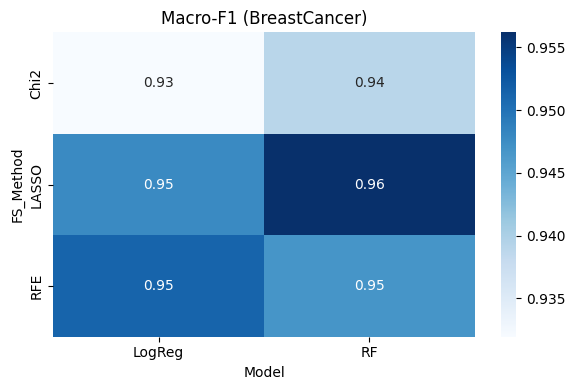

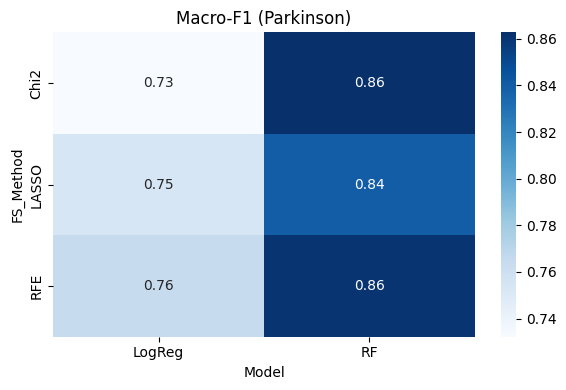

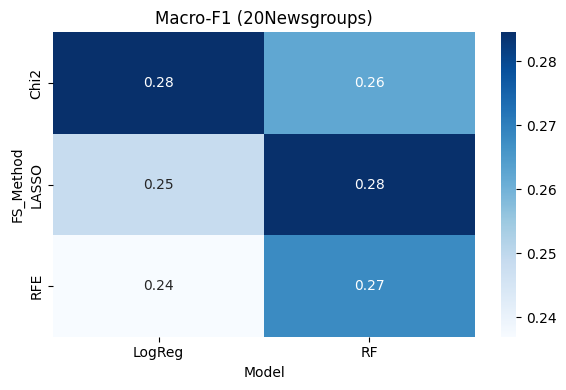

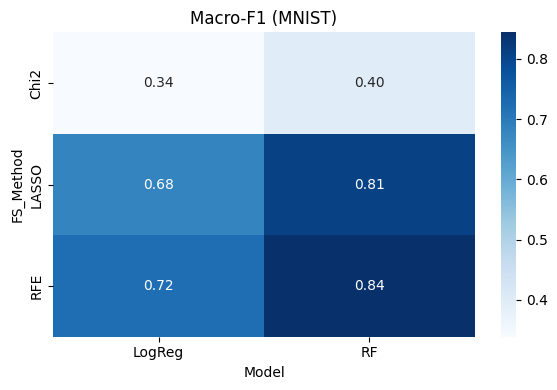

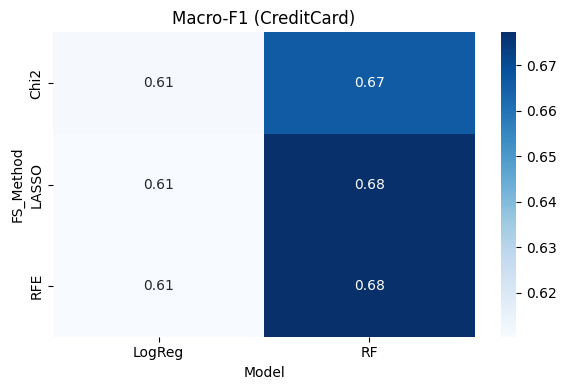

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

domains = df['Domain'].unique()
for dom in domains:
    sub = df[df['Domain']==dom]
    pivot = sub.pivot(index='FS_Method', columns='Model', values='F1_mean')
    plt.figure(figsize=(6,4))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Blues")
    plt.title(f"Macro-F1 ({dom})")
    plt.tight_layout()
    plt.show()

## Cell 3: Barplot Execution Time per FS Method

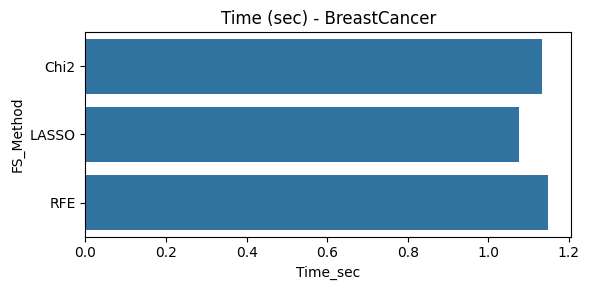

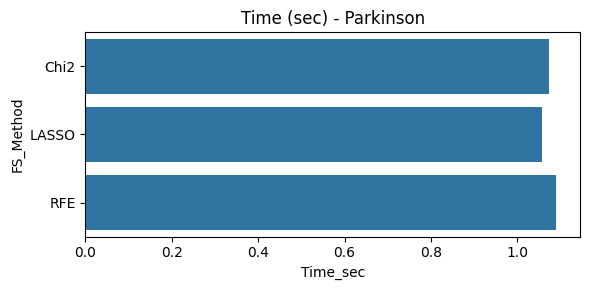

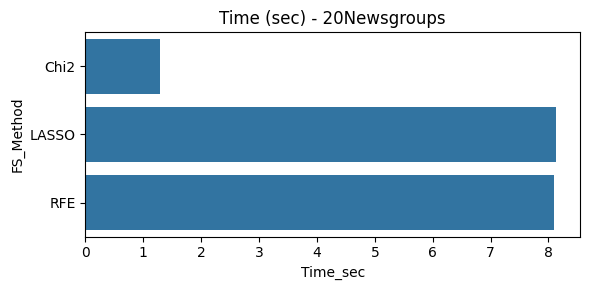

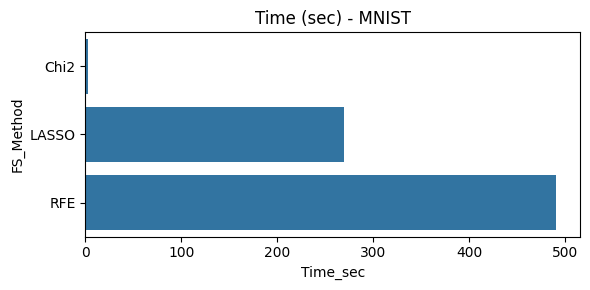

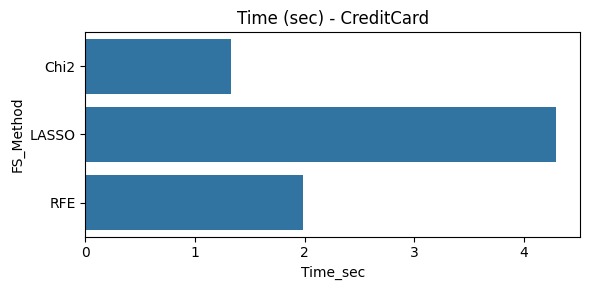

In [3]:
for dom in domains:
    sub = df[df['Domain']==dom]
    avg = sub.groupby('FS_Method')['Time_sec'].mean().reset_index()
    plt.figure(figsize=(6,3))
    sns.barplot(data=avg, x='Time_sec', y='FS_Method', orient='h')
    plt.title(f"Time (sec) - {dom}")
    plt.tight_layout()
    plt.show()

## Cell 4: Boxplot F1 Distribution

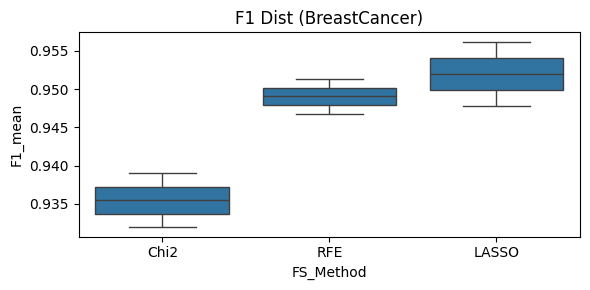

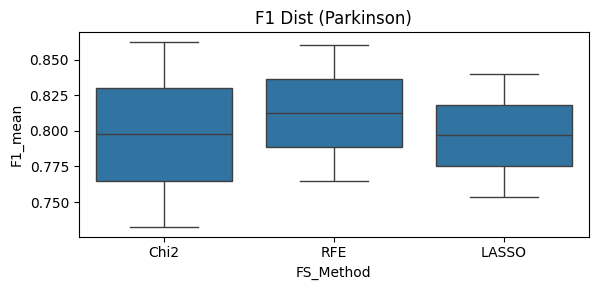

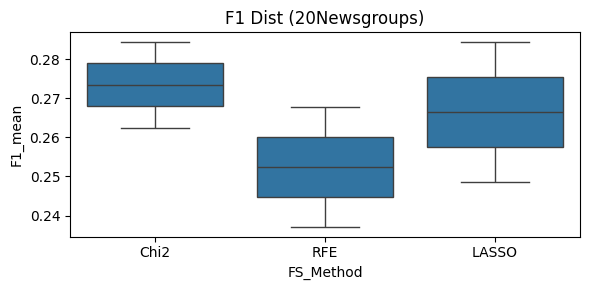

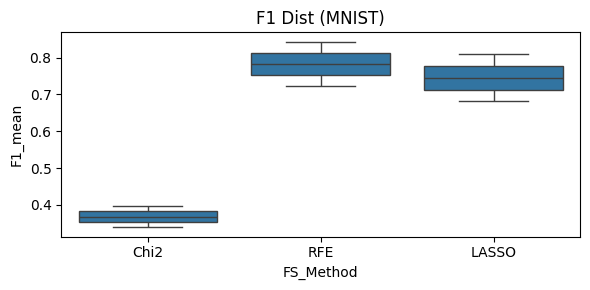

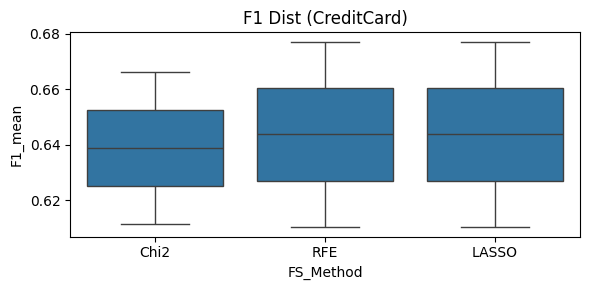

In [4]:
for dom in domains:
    sub = df[df['Domain']==dom]
    plt.figure(figsize=(6,3))
    sns.boxplot(data=sub, x='FS_Method', y='F1_mean')
    plt.title(f"F1 Dist ({dom})")
    plt.tight_layout()
    plt.show()

## Cell 5: Descriptive Statistics

In [5]:
desc = df.groupby(['Domain','FS_Method'])[['F1_mean','Time_sec']].agg(['mean','std']).round(3)
desc

F1_mean        Time_sec        
                          mean    std     mean     std
Domain       FS_Method                                
20Newsgroups Chi2        0.273  0.016    1.283   0.017
             LASSO       0.266  0.025    8.138   1.205
             RFE         0.252  0.022    8.099   0.117
BreastCancer Chi2        0.935  0.005    1.134   0.090
             LASSO       0.952  0.006    1.077   0.013
             RFE         0.949  0.003    1.149   0.002
CreditCard   Chi2        0.639  0.039    1.327   0.069
             LASSO       0.644  0.047    4.299   0.116
             RFE         0.644  0.047    1.985   0.166
MNIST        Chi2        0.368  0.041    2.294   0.431
             LASSO       0.745  0.091  269.386   0.559
             RFE         0.783  0.086  491.056  81.064
Parkinson    Chi2        0.798  0.092    1.073   0.030
             LASSO       0.797  0.061    1.057   0.025
             RFE         0.813  0.068    1.091   0.027

## Cell 6: Average Rank Across Domains

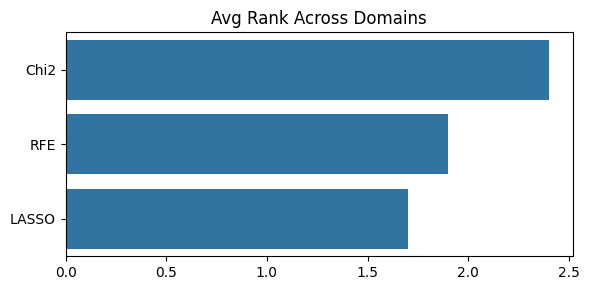

In [6]:
from scipy.stats import rankdata
import numpy as np

ranks = []
for dom in domains:
    sub = df[df['Domain']==dom]
    avg_f1 = sub.groupby('FS_Method')['F1_mean'].mean()
    rank = rankdata(-avg_f1)
    ranks.append(rank)
ranks = np.array(ranks)
avg_rank = ranks.mean(axis=0)
methods = sub['FS_Method'].unique()
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
sns.barplot(x=avg_rank, y=methods)
plt.title("Avg Rank Across Domains")
plt.tight_layout()
plt.show()